<a href="https://colab.research.google.com/github/Priyali2000/Q-Commerce-Customer-Retention-Analysis/blob/main/01_Quick_Commerce_Customer_Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Objective - Quick Commerce Customer Retention Analysis
# Project: End-to-End Customer Analytics Platform
# Dataset: E-Commerce Analytics (Swiggy, Zomato, Blinkit) (Kaggle)

#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

#visualization
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready for Quick Commerce Customer Retention Analysis")


Libraries imported successfully!
Ready for Quick Commerce Customer Retention Analysis


In [2]:
!pip install Kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/.kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
print("Kaggle authentication successful!")

Kaggle authentication successful!


In [6]:
dataset_name = "logiccraftbyhimanshi/e-commerce-analytics-swiggy-zomato-blinkit"

api.dataset_download_files(dataset_name, path='./data', unzip=True)

print("Dataset downloaded successfully!")
!ls -la data/


Dataset URL: https://www.kaggle.com/datasets/logiccraftbyhimanshi/e-commerce-analytics-swiggy-zomato-blinkit
Dataset downloaded successfully!
total 9132
drwxr-xr-x 2 root root    4096 Aug 31 08:33 .
drwxr-xr-x 1 root root    4096 Aug 31 08:33 ..
-rw-r--r-- 1 root root 9340073 Aug 31 08:33 Ecommerce_Delivery_Analytics_New.csv


In [7]:
#Loading and exploring the data
df = pd.read_csv('./data/Ecommerce_Delivery_Analytics_New.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n First 5 rows:")
df.head()

Dataset Shape: (100000, 11)
Columns: ['Order ID', 'Customer ID', 'Platform', 'Order Date & Time', 'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)', 'Customer Feedback', 'Service Rating', 'Delivery Delay', 'Refund Requested']

 First 5 rows:


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [8]:
#Data Cleaning and Preprocessing

In [9]:
# 1. Check missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64


In [10]:
#Order Date to datetime
# Convert 'Order Date & Time' to datetime
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'], errors='coerce')  # coercing errors to handle invalid formats

In [11]:
# Ensure 'Delivery Time (Minutes)' is numeric
df['Delivery Time (Minutes)'] = pd.to_numeric(df['Delivery Time (Minutes)'], errors='coerce')

In [12]:
# Filter out unrealistic delivery times (e.g., less than 1 min or more than 1440 mins (24h))
df = df[(df['Delivery Time (Minutes)'] >= 1) & (df['Delivery Time (Minutes)'] <= 1440)]


In [13]:
# Ensure Service Rating within 1-5 range
df = df[(df['Service Rating'] >= 1) & (df['Service Rating'] <= 5)]

In [14]:
# Normalize 'Platform' and 'Product Category' columns by converting to lowercase and stripping whitespace
df['Platform'] = df['Platform'].str.lower().str.strip()
df['Product Category'] = df['Product Category'].str.lower().str.strip()
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,jiomart,2025-08-31 19:29:30,30,fruits & vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,blinkit,NaT,16,dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,jiomart,2025-08-31 21:29:30,25,beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,jiomart,2025-08-31 19:29:30,42,beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,blinkit,NaT,30,beverages,334,"Fast delivery, great service!",5,No,No


In [15]:
#New features

In [16]:
# Extract order hour and day of week
df['Order Hour'] = df['Order Date & Time'].dt.hour
df['Order DayOfWeek'] = df['Order Date & Time'].dt.day_name()

In [17]:
# Calculate average delivery time per platform (example)
avg_delivery_time_per_platform = df.groupby('Platform')['Delivery Time (Minutes)'].mean()

In [18]:
# Display cleaned dataframe and missing values report
print("\nSample cleaned data:")
print(df.head())

print("\nAverage delivery time per platform:")
print(avg_delivery_time_per_platform)


Sample cleaned data:
    Order ID Customer ID Platform   Order Date & Time  \
0  ORD000001    CUST2824  jiomart 2025-08-31 19:29:30   
1  ORD000002    CUST1409  blinkit                 NaT   
2  ORD000003    CUST5506  jiomart 2025-08-31 21:29:30   
3  ORD000004    CUST5012  jiomart 2025-08-31 19:29:30   
4  ORD000005    CUST4657  blinkit                 NaT   

   Delivery Time (Minutes)     Product Category  Order Value (INR)  \
0                       30  fruits & vegetables                382   
1                       16                dairy                279   
2                       25            beverages                599   
3                       42            beverages                946   
4                       30            beverages                334   

               Customer Feedback  Service Rating Delivery Delay  \
0  Fast delivery, great service!               5             No   
1            Quick and reliable!               5             No   
2      Items 

In [19]:
#Exploratory Data Analysis

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Overview metrics
print("Total Orders:", len(df))
print("Unique Customers:", df['Customer ID'].nunique())

Total Orders: 100000
Unique Customers: 9000


In [22]:
# Key performance metrics
print("Avg Delivery Time:", df['Delivery Time (Minutes)'].mean())
print("Avg Order Value:", df['Order Value (INR)'].mean())
print("Avg Service Rating:", df['Service Rating'].mean())

Avg Delivery Time: 29.53614
Avg Order Value: 590.9944
Avg Service Rating: 3.24079


In [23]:
# Platform comparison
platform_stats = df.groupby('Platform').agg({
    'Delivery Time (Minutes)': 'mean',
    'Order Value (INR)': 'mean',
    'Service Rating': 'mean'
}).round(2)
print(platform_stats)

                  Delivery Time (Minutes)  Order Value (INR)  Service Rating
Platform                                                                    
blinkit                             29.47             589.55            3.23
jiomart                             29.63             590.53            3.25
swiggy instamart                    29.50             592.90            3.24


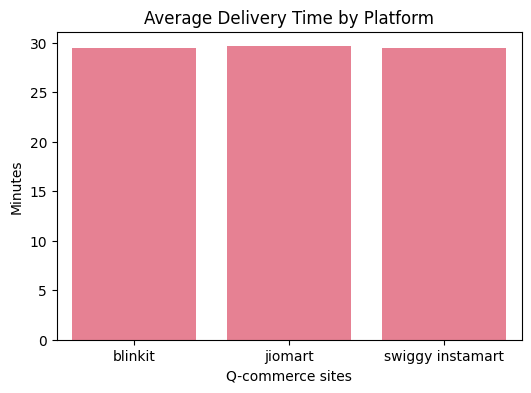

In [24]:
# Visual: Avg delivery time by platform
plt.figure(figsize=(6,4))
sns.barplot(x=platform_stats.index, y='Delivery Time (Minutes)', data=platform_stats.reset_index())
plt.title("Average Delivery Time by Platform")
plt.ylabel("Minutes")
plt.xlabel("Q-commerce sites")
plt.show()

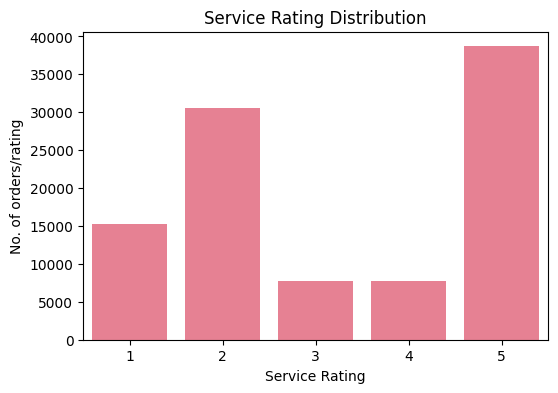

In [25]:
# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Service Rating', data=df)
plt.title("Service Rating Distribution")
plt.ylabel('No. of orders/rating')
plt.show()

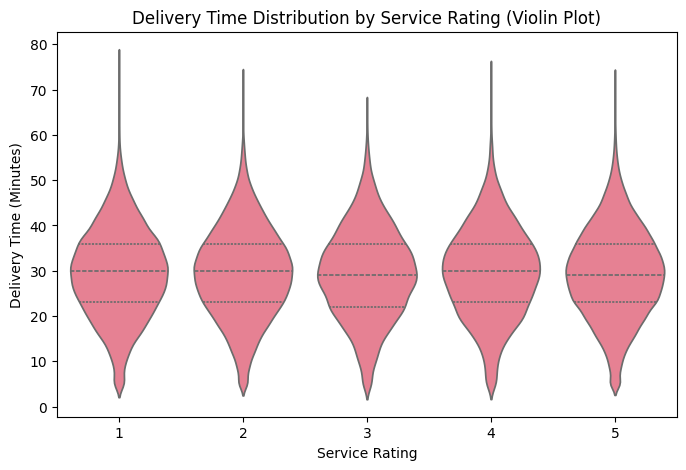

In [26]:
# Delivery time vs. rating
plt.figure(figsize=(8,5))
sns.violinplot(x='Service Rating', y='Delivery Time (Minutes)', data=df, inner='quartile')
plt.title("Delivery Time Distribution by Service Rating (Violin Plot)")
plt.show()

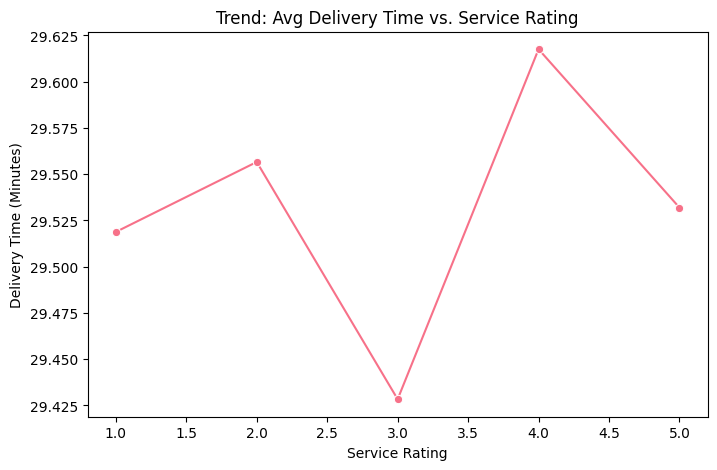

In [27]:
rating_group = df.groupby('Service Rating')['Delivery Time (Minutes)'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='Service Rating', y='Delivery Time (Minutes)', data=rating_group, marker='o')
plt.title("Trend: Avg Delivery Time vs. Service Rating")
plt.show()

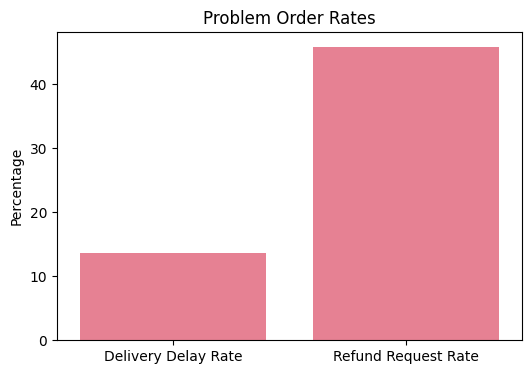

In [28]:
#Delivery delay & refund rates
# Create temporary boolean or numeric Series for plotting
delivery_delay_bool = df['Delivery Delay'] == 'Yes'
refund_requested_bool = df['Refund Requested'] == 'Yes'

rates = {
    'Delivery Delay Rate': delivery_delay_bool.mean() * 100,
    'Refund Request Rate': refund_requested_bool.mean() * 100
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(rates.keys()), y=list(rates.values()))
plt.ylabel("Percentage")
plt.title("Problem Order Rates")
plt.show()

In [29]:
#Advanced EDA

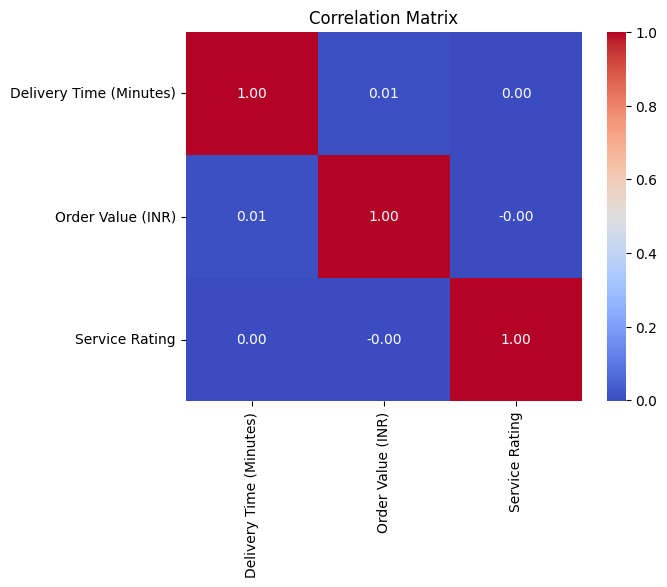

In [30]:
# Correlation matrix
corr = df[['Delivery Time (Minutes)', 'Order Value (INR)', 'Service Rating']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
#blue - negative, red - positive

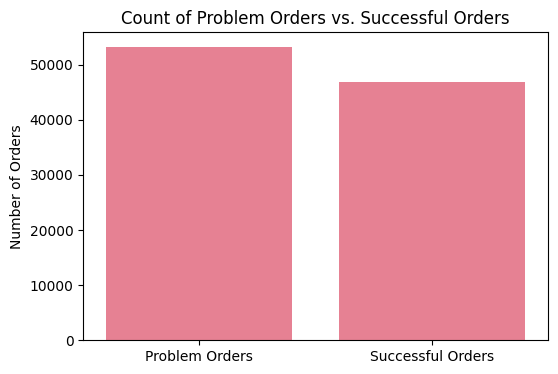

In [31]:
# Problem vs. successful orders

problem = df[delivery_delay_bool | refund_requested_bool]
#print(problem.tail())

# Filter successful orders (neither delay nor refund)
success = df[~(delivery_delay_bool | refund_requested_bool)]
#print(success.tail())

counts = [len(problem), len(success)]
labels = ['Problem Orders', 'Successful Orders']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=counts)
plt.ylabel("Number of Orders")
plt.title("Count of Problem Orders vs. Successful Orders")
plt.show()


In [32]:
#Delivery Delay Prediction Model
"""
Objective -
1.Predict which orders are likely to be delayed
2.Identify the key factors causing delays
3.Provide actionable business insights
4.Quantify potential cost savings
"""

'\nObjective -\n1.Predict which orders are likely to be delayed\n2.Identify the key factors causing delays\n3.Provide actionable business insights\n4.Quantify potential cost savings\n'

In [33]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [34]:
#Checking the cleaned dataset

In [35]:
print(f"Dataset shape: {df.shape}")
print(f"Delivery delay rate: {(df['Delivery Delay'] == 'Yes').mean()*100:.1f}%")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (100000, 13)
Delivery delay rate: 13.7%

First 5 rows:


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Order Hour,Order DayOfWeek
0,ORD000001,CUST2824,jiomart,2025-08-31 19:29:30,30,fruits & vegetables,382,"Fast delivery, great service!",5,No,No,19.0,Sunday
1,ORD000002,CUST1409,blinkit,NaT,16,dairy,279,Quick and reliable!,5,No,No,NaN,NaN
2,ORD000003,CUST5506,jiomart,2025-08-31 21:29:30,25,beverages,599,Items missing from order.,2,No,Yes,21.0,Sunday
3,ORD000004,CUST5012,jiomart,2025-08-31 19:29:30,42,beverages,946,Items missing from order.,2,Yes,Yes,19.0,Sunday
4,ORD000005,CUST4657,blinkit,NaT,30,beverages,334,"Fast delivery, great service!",5,No,No,NaN,NaN


In [36]:
#copy for modeling to avoid changing original data
df_model = df.copy()

# Convert target to binary (0=No Delay, 1=Delay)
df_model['delay_binary'] = (df_model['Delivery Delay'] == 'Yes').astype(int)

print("Target variable distribution:")
print(df_model['delay_binary'].value_counts())

#Summary -
#There is less cases of delay as compared to No delay counts

Target variable distribution:
delay_binary
0    86328
1    13672
Name: count, dtype: int64


In [37]:
#Feature Engineering

In [38]:
# Feature 1: High-value order indicator
median_order_value = df_model['Order Value (INR)'].median()
df_model['high_value_order'] = (df_model['Order Value (INR)'] > median_order_value).astype(int)

print(f"Median order value: ₹{median_order_value:.2f}")
#count of high-valued orders and the percentage they contribute to total orders
print(f"High-value orders: {df_model['high_value_order'].sum()} ({df_model['high_value_order'].mean()*100:.1f}%)")

#Notes -
#Why median and not mean and a threshold value?
#Mean cant handle outliers (Suppose a order of 10k would skew the mean significantly)
#Threshold - If we assume it be Rs500, then most of the orders would be above it and we wouldnt get the correct distribution
#Median gives us 50/50 split of the dataset

#Features like delays, refunds and inventory management can be related using the high-valued order metric

Median order value: ₹481.00
High-value orders: 49933 (49.9%)


In [39]:
#Feature 2: Platform encoding (Assigning number to unique platforms)
le_platform =  LabelEncoder() #Creating an instance of the class in a variable

#convert platform names to numbers
df_model['platform_encoded'] = le_platform.fit_transform(df_model['Platform'])

unique_platforms = le_platform.classes_
encoded_numbers = le_platform.transform(unique_platforms)
platform_mapping = dict(zip(unique_platforms, encoded_numbers))

print(f"Platform encoding: {platform_mapping}")



Platform encoding: {'blinkit': np.int64(0), 'jiomart': np.int64(1), 'swiggy instamart': np.int64(2)}


In [40]:
#Feature 3: Category encoding

le_category = LabelEncoder()
df_model['category_encoded'] = le_category.fit_transform(df_model['Product Category'])

unique_categories = le_category.classes_
encoded_numbers = le_category.transform(unique_categories)
platform_mapping = dict(zip(unique_categories, encoded_numbers))

print(f"Category encoding: {platform_mapping}")

Category encoding: {'beverages': np.int64(0), 'dairy': np.int64(1), 'fruits & vegetables': np.int64(2), 'grocery': np.int64(3), 'personal care': np.int64(4), 'snacks': np.int64(5)}


In [41]:
# Feature 4: Order value bins (Low/Medium/High/Premium)
df_model['order_value_bin'] = pd.cut(
    df_model['Order Value (INR)'],
    bins=[0, 200, 400, 600, float('inf')],
    labels=['Low', 'Medium', 'High', 'Premium']
)

print("Order value distribution by bin:")
print(df_model['order_value_bin'].value_counts())


Order value distribution by bin:
order_value_bin
Premium    38523
Medium     25233
High       21599
Low        14645
Name: count, dtype: int64


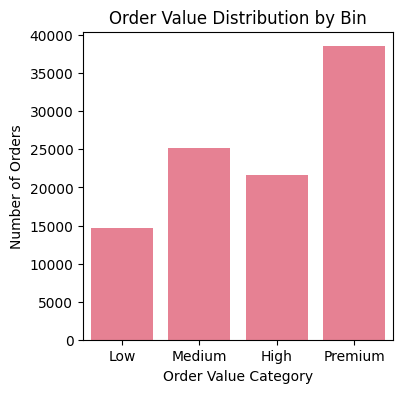

In [42]:

plt.figure(figsize=(4,4))
sns.countplot(x='order_value_bin', data=df_model, order=['Low', 'Medium', 'High', 'Premium'])
plt.title('Order Value Distribution by Bin')
plt.xlabel('Order Value Category')
plt.ylabel('Number of Orders')
plt.show()


In [43]:
#Feature 5:Actual delivery time vs expected delivery time for unique platforms
platform_median_time = df_model.groupby('Platform')['Delivery Time (Minutes)'].median()
print(platform_median_time)

#Map expected deluvery time against each order for the particular platform
df_model['expected_delivery_time'] = df_model['Platform'].map(platform_median_time)
#print(df_model.head())

#We will mark if (actual delivery time > expected) in terms of 0 or 1
df_model['delivery_above_expected'] = (df_model['Delivery Time (Minutes)'] > df_model['expected_delivery_time']).astype(int)




Platform
blinkit             30.0
jiomart             30.0
swiggy instamart    29.0
Name: Delivery Time (Minutes), dtype: float64


In [44]:
#features to include in the model
df_model.head()
feature_columns = [

    'Delivery Time (Minutes)',
    'Order Value (INR)',
    'Service Rating',
    'platform_encoded',
    'category_encoded',
    'high_value_order',
    'delivery_above_expected'

]
print(feature_columns)
X = df_model[feature_columns]
y = df_model['delay_binary']

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution: {y.value_counts()}")

# Show feature statistics
print("\nFeature statistics:")
print(X.describe().round(2))

#Note -
#Why we are using column named 'delay_binary' instead of using 'delivery_above_expected'?
#because 'delay_binary' is a variable for target/outcome whereas,
#'delivery_above_Expected' is a variable with relative to platform's actual delivery time (Feature/Predictor)

['Delivery Time (Minutes)', 'Order Value (INR)', 'Service Rating', 'platform_encoded', 'category_encoded', 'high_value_order', 'delivery_above_expected']
Feature matrix shape: (100000, 7)
Target distribution: delay_binary
0    86328
1    13672
Name: count, dtype: int64

Feature statistics:
       Delivery Time (Minutes)  Order Value (INR)  Service Rating  \
count                100000.00          100000.00       100000.00   
mean                     29.54             590.99            3.24   
std                       9.96             417.41            1.58   
min                       5.00              50.00            1.00   
25%                      23.00             283.00            2.00   
50%                      30.00             481.00            3.00   
75%                      36.00             770.00            5.00   
max                      76.00            2000.00            5.00   

       platform_encoded  category_encoded  high_value_order  \
count         100000.00 

In [45]:
#Splitting dataset into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape} samples")
print(f"Training delay rate: {y_train.mean()*100:.1f}%") # % of delayed orders in training set
print(f"Test delay rate: {y_test.mean()*100:.1f}%") # % of delayed orders in testing set

#Note -
#Stratify: Ensures both training and testing sets have similar delay rates

Training set shape: (70000, 7)
Testing set shape: (30000, 7)
Training set: 70000 samples
Test set: (30000, 7) samples
Training delay rate: 13.7%
Test delay rate: 13.7%


In [47]:
#Features scaling (Linear Model : Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed")
print("Original delivery time range:", X_train['Delivery Time (Minutes)'].min(), "to", X_train['Delivery Time (Minutes)'].max())
print("Scaled delivery time range:", X_train_scaled[:, 0].min().round(2), "to", X_train_scaled[:, 0].max().round(2))

Feature scaling completed
Original delivery time range: 5 to 76
Scaled delivery time range: -2.46 to 4.66
